<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [147]:
data = pd.read_csv('module2-vector-representations\data\job_listings.csv', index_col='Unnamed: 0')
data.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [148]:
print(data.shape)
data.tail()

(426, 2)


,description,title
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist
425,b'<div></div><div><div><div><div><p>Cerner Int...,Data Scientist


## Lot's of html tags, let's use beautiful soup to remove them

In [10]:
pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1278 sha256=3d08b1ffbe2345f599f29750b6654efb5fa0111949a847aafda5a328f63d7d99
  Stored in directory: C:\Users\Nick\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [249]:
from bs4 import BeautifulSoup
stripped = []
for i in data['description']:
    stripped.append(BeautifulSoup(i).text)
data['stripped'] = stripped

In [242]:
data.description[0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [243]:
data.stripped[0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

## 2) Use Spacy to tokenize / clean the listings 

In [235]:
data['stripped']

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
5      b'Create various Business Intelligence Analyti...
6      b'As Spotify Premium swells to over 96M subscr...
7      b"Everytown for Gun Safety, the nation's large...
8      b"MS in a quantitative discipline such as Stat...
9      b'Slack is hiring experienced data scientists ...
10     b'Who We Are\nBlackThorn Therapeutics is a com...
11     b'Part-timeAbout The Opportunity\nHere at Grub...
12     b"nfosys\xe2\x80\x93 Data & Analytics \xe2\x80...
13     b'As Spotify Premium swells to over 96M subscr...
14     b'Experience with guiding R&D strategy for you...
15     b'The Atlantic is seeking a Data Scientist to ...
16     b'THE CHALLENGE\nEventbrite is big, bustling m...
17     b'ContractWe are looking

In [250]:
# Use re to remove unwanted '\\n', b", b', and other punctation
# that tokenizer might miss because they are 'connected' to words
data['stripped'] = [re.sub(r'\\n', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub('b"', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub("b'", ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub('/', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub(r'\\', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub(':', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub(',', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub(';', ' ', i) for i in data['stripped']]
data['stripped'] = [re.sub("'", '', i) for i in data['stripped']]
data['stripped'] = [re.sub('"', '', i) for i in data['stripped']]
data['stripped']

0       Job Requirements  Conceptual understanding in...
1       Job Description  As a Data Scientist 1  you w...
2       As a Data Scientist you will be working on co...
3       $4 969 - $6 756 a monthContractUnder the gene...
4       Location  USA  xe2 x80 x93 multiple locations...
5       Create various Business Intelligence Analytic...
6       As Spotify Premium swells to over 96M subscri...
7       Everytown for Gun Safety  the nations largest...
8       MS in a quantitative discipline such as Stati...
9       Slack is hiring experienced data scientists t...
10      Who We Are BlackThorn Therapeutics is a compu...
11      Part-timeAbout The Opportunity Here at Grubhu...
12      nfosys xe2 x80 x93 Data & Analytics  xe2 x80 ...
13      As Spotify Premium swells to over 96M subscri...
14      Experience with guiding R&D strategy for your...
15      The Atlantic is seeking a Data Scientist to h...
16      THE CHALLENGE Eventbrite is big  bustling mar...
17      ContractWe are looking 

In [172]:
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [321]:
# Without this we end up with blank space as a token in some cases
STOPS = nlp.Defaults.stop_words.union([' '])
print(STOPS)

{'another', 'although', 'somewhere', 'not', 'yet', 'anyway', 'whence', 'being', 'next', 'somehow', 'more', 'one', 'among', 'me', 'who', 'enough', 'neither', 'whatever', 'sometime', 'whenever', '’s', 'an', 'whereupon', 'became', 'in', 'off', 'seem', '’ll', 'does', 'every', 'eight', 'otherwise', 'has', 'might', 'top', 'then', 'must', 'because', 'doing', 'so', 'few', 'hence', 'show', 'nevertheless', 'both', 'of', 'wherever', 'already', 'have', 'myself', 'go', 'with', 'whose', 'really', 'seeming', 'front', 'full', 'seemed', 'latter', 'without', 'therein', 'say', 'five', 'whoever', 'upon', 'nobody', 'herein', 'him', 'anyhow', 'namely', 'serious', 'towards', 'thence', 'anything', 'own', "'d", 'and', 'either', 'via', 'regarding', 'beforehand', 'can', 'its', 'what', 'perhaps', 'do', 'could', 'much', 'after', 'when', 'eleven', 'less', 'their', 'will', 'made', 'amongst', 'third', 'amount', 'two', 'please', 'sixty', ' ', 'too', 'per', 'himself', 'ten', "'re", 'always', 'beyond', 'here', 'througho

In [251]:
tokens = []
for i in tokenizer.pipe(data['stripped']):
    doc_tokens = []
    for token in i:
        if (token.text.lower() not in STOPS) & (token.is_punct != True):
            doc_tokens.append(token.lemma_)
    tokens.append(doc_tokens)
data['tokens'] = tokens

In [252]:
data['stripped'][0]

' Job Requirements  Conceptual understanding in Machine Learning models like Nai xc2 xa8ve Bayes  K-Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python R. (Ability to write functions  clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy  SciPy  Pandas  Matplotlib etc in Python or GGPlot2  dplyr  tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub  Kaggle or any other published article Masters degree in Statistics Mathematics Computer Science or any other quant specific field. Apply Now'

In [253]:
data['tokens'][0]

['Job',
 'Requirements',
 'Conceptual',
 'understand',
 'Machine',
 'Learning',
 'model',
 'like',
 'Nai',
 'xc2',
 'xa8ve',
 'Bayes',
 'K-Means',
 'SVM',
 'Apriori',
 'Linear',
 'Logistic',
 'Regression',
 'Neural',
 'Random',
 'Forests',
 'Decision',
 'Trees',
 'K-NN',
 'hands-on',
 'experience',
 '2',
 'Intermediate',
 'expert',
 'level',
 'code',
 'skill',
 'Python',
 'R.',
 '(Ability',
 'write',
 'function',
 'clean',
 'efficient',
 'datum',
 'manipulation',
 'mandatory',
 'role)',
 'Exposure',
 'package',
 'like',
 'NumPy',
 'SciPy',
 'Pandas',
 'Matplotlib',
 'etc',
 'Python',
 'GGPlot2',
 'dplyr',
 'tidyR',
 'R',
 'Ability',
 'communicate',
 'Model',
 'finding',
 'Technical',
 'Non-Technical',
 'stake',
 'holder',
 'Hands',
 'experience',
 'SQL',
 'Hive',
 'similar',
 'programme',
 'language',
 'past',
 'work',
 'GitHub',
 'Kaggle',
 'publish',
 'article',
 'Masters',
 'degree',
 'Statistics',
 'Mathematics',
 'Computer',
 'Science',
 'quant',
 'specific',
 'field.',
 'Apply']

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [312]:
def count_vector_to_df(text):
    '''
    Takes in a list (or converts input to list)
    of text documents and returns
    a dataframe of word counts
    '''
    if type(text) is list:
        texts = text
    else:
        texts = text.tolist()
    vect = CountVectorizer()
    vect.fit(texts)
    dtm = vect.transform(texts)
    cols = vect.get_feature_names()
    data = dtm.todense()
    return pd.DataFrame(data, columns=cols)

In [318]:
dtm = count_vector_to_df(data['stripped'])
dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

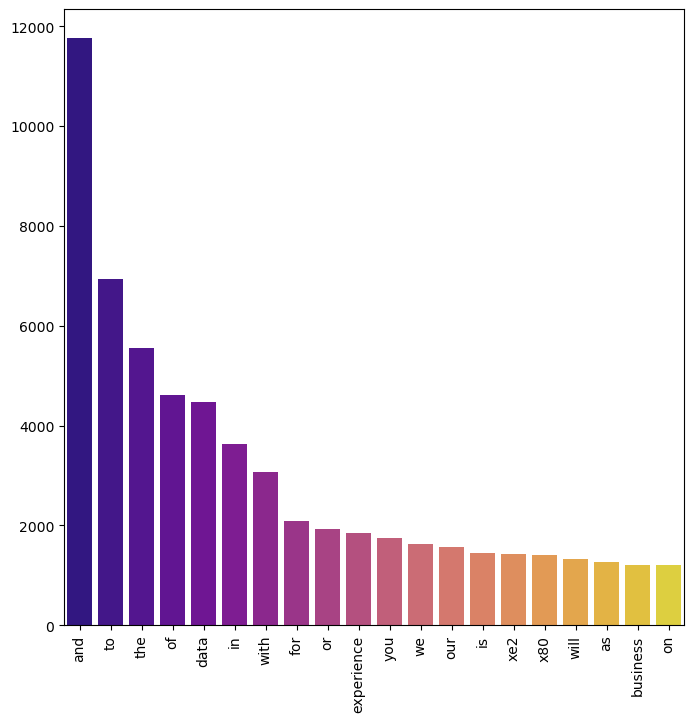

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

x = dtm.sum().sort_values(ascending=False)[:20].index
y = dtm.sum().sort_values(ascending=False)[:20].values

with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x=x, y=y, palette='plasma')
    plt.xticks(rotation=90)

Pretty boring most common words

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [419]:
def tfidfvector_to_df(text):
    '''
    Takes in a list (or converts input to list)
    of text documents and returns
    a dataframe of tfidfvectorizer and a
    tfidfVectorizer object
    '''
    if type(text) is list:
        texts = text
    else:
        texts = text.tolist()
    vect = TfidfVectorizer(stop_words='english', min_df=.02, max_df=.98, ngram_range=(1,2))
    dtm = vect.fit_transform(texts)
    cols = vect.get_feature_names()
    data = dtm.todense()
    return pd.DataFrame(data, columns=cols), vect

In [420]:
df, tfidf = tfidfvector_to_df(data['stripped'])
df.head()

,000,10,10 years,100,11,12,12 months,15,20,200,...,years professional,years related,years relevant,years work,years xe2,yes,york,york city,youll,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
tfidf.get_feature_names()

['000',
 '10',
 '10 years',
 '100',
 '11',
 '12',
 '12 months',
 '15',
 '20',
 '200',
 '2019',
 '25',
 '30',
 '3rd',
 '40',
 '401',
 '401k',
 '50',
 '500',
 '600',
 '600 cities',
 '90',
 'aa',
 'abilities',
 'abilities perspectives',
 'ability',
 'ability build',
 'ability clearly',
 'ability communicate',
 'ability develop',
 'ability effectively',
 'ability lead',
 'ability manage',
 'ability present',
 'ability translate',
 'ability work',
 'ability write',
 'able',
 'able work',
 'academic',
 'accelerate',
 'accept',
 'accept unsolicited',
 'access',
 'accessible',
 'accommodation',
 'accommodations',
 'accomplish',
 'accordance',
 'according',
 'account',
 'accountability',
 'accounts',
 'accredited',
 'accuracy',
 'accurate',
 'achieve',
 'achieve mission',
 'achieving',
 'acquire',
 'acquisition',
 'act',
 'action',
 'action employer',
 'actionable',
 'actionable insights',
 'actions',
 'active',
 'actively',
 'activities',
 'acumen',
 'ad',
 'ad hoc',
 'add',
 'addition',
 'add

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [482]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(df)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [488]:
ideal_job = ["You will have nearly no oversight. Get paid a lot of money. Ability to work remotely. Room for upward mobility. Minimal requirements, maximum reward. Good retirement plan, 401k. Bonuses every month. Including unlimited paid time off. Best job you'll ever find. You will get to use Data Science and machine learning to build robots to take over the world! Did we mention all the benefits? Don't worry about paying for a car, it's all included! We'll buy you a house, and a car"]
# This is a joke^
my_test = tfidf.transform(ideal_job)
my_jobs = nn.kneighbors(my_test.todense())
to_plot = pd.DataFrame({'Job': my_jobs[1][0].tolist(), 'Score': my_jobs[0][0].tolist()})

In [489]:
to_plot.sort_values(by='Score', ascending=False)

,Job,Score
4,309,1.322433
3,387,1.317176
2,84,1.295881
1,306,1.279492
0,314,1.275661


Let's look at some of these job descriptions and see how they look!

In [491]:
data['stripped'][309]

' ContractJob Description What You xe2 x80 x99ll Get to Do  We are looking for talented IT Engineer professionals that are excited about the dynamic intelligence community space and using the latest technologies available to create truly rich user experiences. This is your opportunity to work with a highly talented engineering team that builds technology that bridges software and intelligence community needs. Our client engagement processes  the way we collaborate  operate  and deliver value provides an unparalleled opportunity to grow and advance. Choose us  and make delivering innovative work part of your extraordinary career.  Summary  BIT Systems Inc.  a CACI Company  is looking for Data Scientist Researchers to work in our research and development lab in the Aurora  CO area. Become a member of a software development team supporting a large  multi-delivery  multi-year development contract supporting national and tactical requirements. Responsible for design analysis  problem solvin

In [492]:
data['stripped'][387]

' Are you passionate about using the power of technology to build community? Do you believe residents can strengthen their neighborhoods through dialog and collaboration? Would you like to join a transformative company and play a meaningful role in shaping its future? If so  wed love to meet you.  We are looking to hire an experienced Data Scientist to join our team. In this role  youll focus on questions centering around identity  security  and community health. Youll help determine what data should be tracked and work with Product and Engineering to implement your vision. You will also be part of the team responsible for building and scaling our data infrastructure that will be the foundation of analytics and data science around our unique data set. Youll directly contribute to scaling our analytical abilities and will help lead us to the future of data at Nextdoor.  Responsibilities   Conduct in-depth analysis on Nextdoor data  analyzing community growth  platform engagement  and tr

In [486]:
data['stripped'][84]

' InternshipData Scientist Intern  Are you someone interested in applying your knowledge and experience about machine learning and artificial intelligence onto real applications? Then here s your chance to be a Data Scientist Intern on the Research and Development team at HCSS!  Being a software company in the construction realm  we re constantly innovating and playing with the latest tools  providing high quality support for our customers while providing a great work-life balance for our employees.  What are you expected to do?   Participate in efforts to create software to perform data analysis that will include  Artificial Intelligence modeling Data mining Designing and implementing deployment to include API  Requirements   Knowledge of Python programing Familiarity with AI modeling libraries like TensorFlow and Keras Familiarity with query languages like SQL During the time of your internship  you must be enrolled in an accredited college university and be able to commute to our of

In [493]:
data['stripped'][306]

' Please review the job details below. Radiant Solutions is growing and we are looking for motivated data evangelists who are passionate about delivering new and innovative solutions for our customers. The ideal candidate needs limited direction  is passionate about technology and is curious about earth sensing and the new space economy. What you ll get to do  You will be applying the latest machine learning techniques to extract insights from geospatial data. You will have access to an enormous corpus of training data and will work to build the best models through bake-offs  hyperparameter searching  and incremental learning techniques. You will quantitatively assess model performance and document the overall life-cycle. You will work with other members of the data science and engineering teams to improve data science products and experiences. Additionally  you will be developing rapid prototype solutions as needed for the focused collection  parsing  managing  analyzing  and visualiz

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 